# Data Exploration and Preparation

## Data

The file movies_merged contains a dataframe with the same name that has 40K rows and 39 columns. Each row represents a movie title and each column represents a descriptor such as Title, Actors, and Budget. I collected the data by querying IMDb’s API (see www.omdbapi.com) and joining it with a separate dataset of movie budgets and gross earnings (unknown to you). The join key was the movie title. This data is available for personal use, but IMDb’s terms of service do not allow it to be used for commercial purposes or for creating a competing repository.

## Objective

Your goal is to investigate the relationship between the movie descriptors and the box office success of movies, as represented by the variable Gross. This task is extremely important as it can help a studio decide which titles to fund for production, how much to bid on produced movies, when to release a title, how much to invest in marketing and PR, etc. This information is most useful before a title is released, but it is still very valuable after the movie is already released to the public (for example it can affect additional marketing spend or how much a studio should negotiate with on-demand streaming companies for “second window” streaming rights).

## Setup

### Load Packages

In [1]:
# You may load other packages like seaborn for plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import math
import string

### Load Data

Load the CSV file into a dataframe called "df" and perform the following initial investigations:
    * list the dimensions of the df
    * list the head
    * list the summary
    * describe the df

In [2]:
# Code here
df = pd.read_csv("C:\\Users\\Nikhil\\Desktop\\SPJain-Programming\\Navnit_sir_Assignment_1\\movies.csv")
df.head()

,Unnamed: 0,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,...,tomatoURL,DVD,BoxOffice,Production,Website,Response,Budget,Domestic_Gross,Gross,Date
0,1,39 Pounds of Love,2005,UNRATED,2005-04-08,70 min,"Documentary, Biography, Romance",Dani Menkin,"Ilan Heitner, Dani Menkin",Ami Ankilewitz,...,http://www.rottentomatoes.com/m/1175966-color_...,2007-05-29,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
1,2,3:am,2005,NOT RATED,2005-01-25,21 min,"Short, Thriller",Ryan Bradford,"Ryan Bradford, Ryen Schlegel","Mike Ashworth, Jen Badewitz, Ryan Bradford, Se...",...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
2,3,500 Years Later,2005,NaN,2005-02-24,106 min,Documentary,Owen Alik Shahadah,M.K. Asante,"Kolfi Adu, Sona Jobarteh, Hunter Adams III, Ha...",...,http://www.rottentomatoes.com/m/500_years_later/,2008-01-08,NaN,Codeblack TV,http://www.500yearslater.com/,True,NaN,NaN,NaN,NaN
3,4,5th World,2005,NaN,2005-01-20,75 min,"Drama, Romance",Blackhorse Lowe,Blackhorse Lowe,"Livandrea Knoki, Sheldon Silentwalker, Ernest ...",...,http://www.rottentomatoes.com/m/world_poker_5t...,2006-10-31,NaN,NaN,http://www.variety.com/review/VE1117926147.htm...,True,NaN,NaN,NaN,NaN
4,5,90,2005,NaN,2005-03-12,14 min,"War, Short",Jason Wise,Jason Wise,"Bryan Barnett-Woods, Oto Brezina, Mike Dunn, E...",...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN


In [3]:
df.shape

(40789, 40)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40789 entries, 0 to 40788
Data columns (total 40 columns):
Unnamed: 0           40789 non-null int64
Title                40789 non-null object
Year                 40789 non-null int64
Rated                20003 non-null object
Released             35719 non-null object
Runtime              39805 non-null object
Genre                39755 non-null object
Director             39470 non-null object
Writer               36394 non-null object
Actors               39161 non-null object
Plot                 33621 non-null object
Language             39069 non-null object
Country              40217 non-null object
Awards               15070 non-null object
Poster               27488 non-null object
Metascore            5210 non-null float64
imdbRating           39535 non-null float64
imdbVotes            39497 non-null float64
imdbID               40789 non-null object
Type                 40789 non-null object
tomatoMeter          9458 non-n

In [5]:
df.describe()

,Unnamed: 0,Year,Metascore,imdbRating,imdbVotes,tomatoMeter,tomatoRating,tomatoReviews,tomatoFresh,tomatoRotten,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,Budget,Domestic_Gross,Gross,Date
count,40789.000000,40789.000000,5210.000000,39535.000000,3.949700e+04,9458.000000,9448.000000,9502.000000,9502.000000,9502.000000,18097.000000,18181.000000,2.407100e+04,4.583000e+03,4.583000e+03,4.583000e+03,4583.000000
mean,25116.814877,1980.954963,54.784261,6.252146,1.205867e+04,58.579192,5.874968,57.375289,34.281309,23.093980,55.542742,3.264760,9.270171e+04,3.178640e+07,4.263995e+07,9.029135e+07,2002.823696
std,24214.945395,25.020166,18.049470,1.207422,5.702163e+04,28.856973,1.527928,63.167701,46.668462,30.997875,23.521943,0.558422,1.425632e+06,4.060028e+07,6.460616e+07,1.669594e+08,12.044254
min,1.000000,1888.000000,1.000000,1.000000,5.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.100000e+03,0.000000e+00,0.000000e+00,1915.000000
25%,10414.000000,1962.000000,42.000000,5.600000,6.100000e+01,35.000000,4.800000,11.000000,5.000000,3.000000,38.000000,2.900000,4.700000e+01,5.000000e+06,2.198847e+06,4.670743e+06,1999.000000
50%,20691.000000,1989.000000,55.000000,6.400000,2.140000e+02,63.000000,6.000000,28.000000,15.000000,9.000000,57.000000,3.300000,3.420000e+02,1.800000e+07,1.906824e+07,2.927690e+07,2005.000000
75%,31696.000000,2001.000000,68.000000,7.100000,1.343000e+03,83.000000,7.000000,87.000000,43.000000,30.000000,75.000000,3.600000,4.935000e+03,4.000000e+07,5.472205e+07,1.003587e+08,2011.000000
max,112382.000000,2018.000000,100.000000,9.800000,1.684836e+06,100.000000,9.800000,360.000000,343.000000,249.000000,100.000000,5.000000,3.579456e+07,4.250000e+08,7.605076e+08,2.783919e+09,2017.000000


## Tasks

Each task below is worth 10 points, and is meant to be performed sequentially, i.e. do step 2 after you have processed the data as described in step 1. Total points: 100
Complete each task by implementing code chunks as described by TODO comments, and by responding to questions (“Q:”) with written answers (“A:”). If you are unable to find a meaningful or strong relationship in any of the cases when requested, explain why not by referring to appropriate plots/statistics.

### Task 1: Remove non-movie rows

The variable Type captures whether the row is a movie, a TV series, or a game. Remove all rows from df that do not correspond to movies.

In [6]:
# Your code for task 1 here:
df1=df[df.Type=="movie"]
print(df1.shape)
print(len(df1))

(40000, 40)
40000


Question: how many rows are left after removal?

Answer: 40000

### Task 2: Process Runtime column
The variable Runtime represents the length of the title as a string. Write Python code to convert it to a numeric
value (in minutes) and replace df.Runtime with the new numeric column RuntimeMins.

In [7]:
# Code for task 2 here
# ideally write a function here that will do the required processing 
# and then call the function on the Runtime. 
# Use Regular Expressions.
PATTERN_HOUR = r'([0-9]+) h'
PATTERN_MINS = r'([0-9]+) min'

def get_time_minutes(val):
    mins = 0
    search_obj_hr = re.search(PATTERN_HOUR, val)
    if search_obj_hr:
        mins = 60 * int(search_obj_hr.group(1))

    search_obj_mins = re.search(PATTERN_MINS, val)
    if search_obj_mins:
        mins += int(search_obj_mins.group(1))

    return mins

In [8]:
df1['Runtime'].fillna('', inplace=True)
df1['Budget'].fillna(0, inplace=True)
df1['Runtime_mins'] = df1['Runtime'].apply(lambda val : get_time_minutes(val) if val else None)
df1['Runtime_mins'].fillna(df1['Runtime_mins'].mean(), inplace=True)

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\Nikhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
df1[df1['Runtime'].str.contains('h')][['Runtime','Runtime_mins']].sample(10)

,Runtime,Runtime_mins
35714,1 h 15 min,75.0
31072,1 h 21 min,81.0
14892,2 h 22 min,142.0
9883,1 h 32 min,92.0
23631,1 h 27 min,87.0
12703,1 h 39 min,99.0
17360,1 h 12 min,72.0
33527,1 h 30 min,90.0
7791,1 h 22 min,82.0
18325,1 h 23 min,83.0


In [10]:
df1.drop(['Runtime','Unnamed: 0','Website','Director','Writer','Plot','Poster','Title','Rated','DVD','Response','Website'],axis=1,inplace=True)

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
df1.columns

Index(['Year', 'Released', 'Genre', 'Actors', 'Language', 'Country', 'Awards',
       'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'Type', 'tomatoMeter',
       'tomatoImage', 'tomatoRating', 'tomatoReviews', 'tomatoFresh',
       'tomatoRotten', 'tomatoConsensus', 'tomatoUserMeter',
       'tomatoUserRating', 'tomatoUserReviews', 'tomatoURL', 'BoxOffice',
       'Production', 'Budget', 'Domestic_Gross', 'Gross', 'Date',
       'Runtime_mins'],
      dtype='object')

In [12]:
df1.shape

(40000, 30)

In [13]:
df1.Runtime_mins.describe()

count    40000.000000
mean        81.794160
std         37.929761
min          1.000000
25%         72.000000
50%         90.000000
75%        100.000000
max        873.000000
Name: Runtime_mins, dtype: float64

In [14]:
df1.Runtime_mins.median()

90.0


Now investigate the distribution of Runtime values and how it changes over years (variable Year, which you can bucket into decades) and in relation to the budget (variable Budget). Include any plots that illustrate.

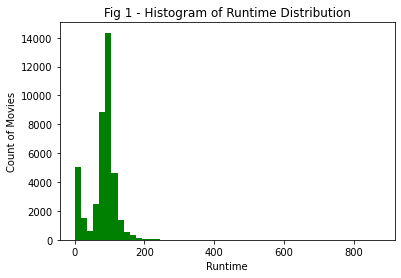

In [15]:
# Code and plots here
plt.hist(df1['Runtime_mins'],bins=50,color='green')
plt.title("Fig 1 - Histogram of Runtime Distribution")
plt.xlabel("Runtime")
plt.ylabel("Count of Movies")
plt.show()

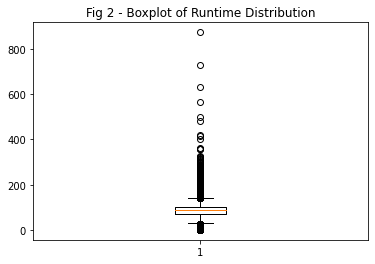

In [16]:
plt.boxplot(df1['Runtime_mins'])
plt.title("Fig 2 - Boxplot of Runtime Distribution")
plt.show()

In [17]:
df1["Decade"]=df1.Year - df1.Year % 10

C:\Users\Nikhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


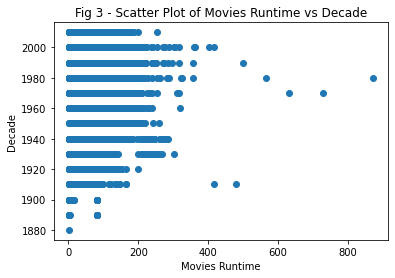

In [18]:
plt.scatter(df1['Runtime_mins'],df1['Decade'])
plt.xlabel("Movies Runtime")
plt.ylabel("Decade")
plt.title("Fig 3 - Scatter Plot of Movies Runtime vs Decade")
plt.show()

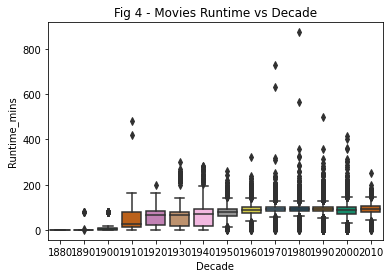

In [19]:
sns.boxplot(x='Decade',y='Runtime_mins',data=df1,palette='colorblind')
plt.title("Fig 4 - Movies Runtime vs Decade")
plt.show()

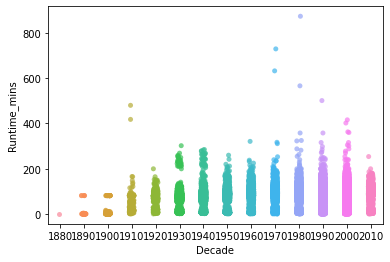

In [20]:
#Additional
sns.stripplot(x='Decade',y='Runtime_mins',data=df1,jitter=True,marker='o',alpha=0.7)
plt.show()

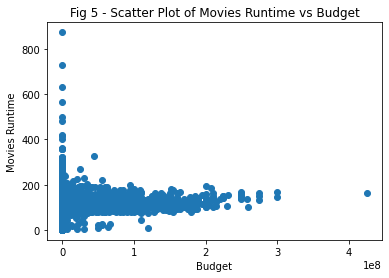

In [21]:
plt.scatter(df1['Budget'],df1['Runtime_mins'])
plt.xlabel("Budget")
plt.ylabel("Movies Runtime")
plt.title("Fig 5 - Scatter Plot of Movies Runtime vs Budget")
plt.show()

Question: Comment on the distribution as well as relationships. Are there any patterns or trends that you can observe? Enter answer in the below cell.

Answer: Mean Runtime of movies is 81.79 mins & Std Dev is 37.92. Most of the movies Runtime is close to 90 mins (which is the Median).

By bucketing Runtime into Decades, we can notice from box plot of fig 4 that the Median Runtime of movies do not vary much from 1920s to 2010s.

For Budget & Runtime, as described in fig 5, it seems that the movie with highest & lowest runtime has lower Budget. Most of the movies which have Runtime around Median have higher Budget. This means that the Runtime distribution with respect to Budget follows a Gaussian Distribution.

### Task 3: Encode Genre Column

The column Genre represents a list of genres associated with the movie in a string format. Write code to parse each text string into a binary vector with 1s representing the presence of a genre and 0s the absence, and add it to the dataframe as additional columns. Then remove the original Genre column.
For example, if there are a total of 3 genres: Drama, Comedy, and Action, a movie that is both Action and Comedy should be represented by a binary vector <0, 1, 1>. Note that you need to first compile a dictionary of all possible genres and then figure out which movie has which genres.

In [22]:
# Code for task 3 here
df1 = df1.join(df1["Genre"].str.get_dummies(', '))
df1.head()

,Year,Released,Genre,Actors,Language,Country,Awards,Metascore,imdbRating,imdbVotes,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,2005,2005-04-08,"Documentary, Biography, Romance",Ami Ankilewitz,"English, Hebrew, Spanish",USA,3 wins.,56.0,6.8,234.0,...,0,0,1,0,0,0,0,0,0,0
1,2005,2005-01-25,"Short, Thriller","Mike Ashworth, Jen Badewitz, Ryan Bradford, Se...",English,USA,NaN,NaN,8.2,13.0,...,0,0,0,0,1,0,0,1,0,0
2,2005,2005-02-24,Documentary,"Kolfi Adu, Sona Jobarteh, Hunter Adams III, Ha...",English,"UK, USA",2 wins.,NaN,7.0,161.0,...,0,0,0,0,0,0,0,0,0,0
3,2005,2005-01-20,"Drama, Romance","Livandrea Knoki, Sheldon Silentwalker, Ernest ...","English, Navajo",USA,1 win.,NaN,6.4,31.0,...,0,0,1,0,0,0,0,0,0,0
4,2005,2005-03-12,"War, Short","Bryan Barnett-Woods, Oto Brezina, Mike Dunn, E...","English, German",USA,NaN,NaN,8.3,18.0,...,0,0,0,0,1,0,0,0,1,0


#DO NOT RUN THIS
#Another method (not used in this code) to get Unique Genre List:
unique_genre = set()
def get_genres(genres: str):
    genres_lst = genres.split(',')
    unique_genre.update([val.strip() for val in genres_lst])
    return unique_genre

df1['Genre'].fillna('unknown', inplace=True)
all_genres = df1['Genre'].unique()
_ = list(map(get_genres, all_genres))
unique_genre_lst = list(unique_genre)
unique_genre_lst.sort()
unique_genre_lst

#DO NOT RUN THIS
#Not used in this code:
def encode_genre(genres: str):
    encoded_dict = {}
    input_genres_lst = [val.strip() for val in genres.split(',')]
    for genre in unique_genre_lst:
        if genre in input_genres_lst:
            encoded_dict.update({genre: 1})
        else:
            encoded_dict.update({genre: 0})
    return encoded_dict

df1[unique_genre_lst] = df1.apply(lambda row: pd.Series(encode_genre(row['Genre'])) , axis=1)

What are the 10 most common genres? Plot the relative proportions of movies having the top 10 most common genres.

In [23]:
# Code here
genres=df1.loc[:,"Action":"Western"]
counts=genres.sum(axis=0)
top10genre=counts.sort_values(ascending=False)[0:10]
top10genre

Drama          15859
Comedy         12849
Short           6516
Romance         4975
Action          4413
Crime           4062
Thriller        3380
Documentary     3051
Adventure       2928
Animation       2788
dtype: int64

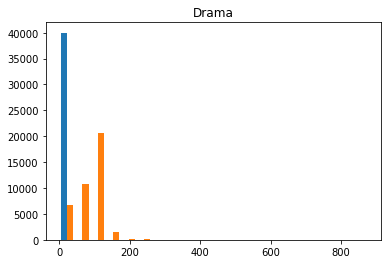

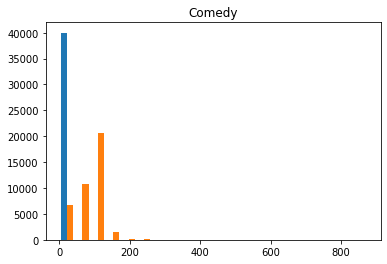

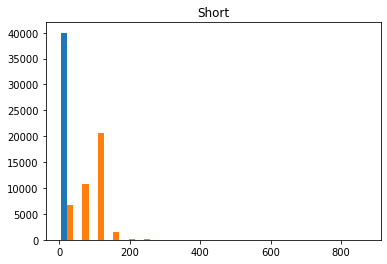

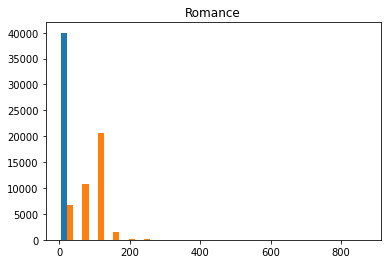

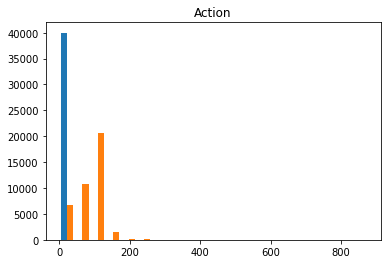

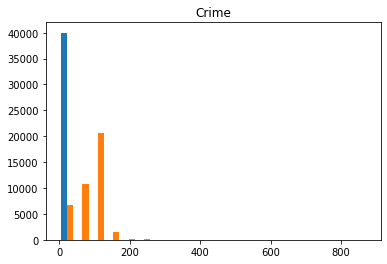

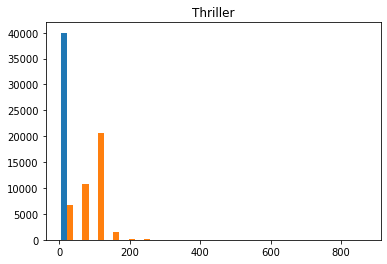

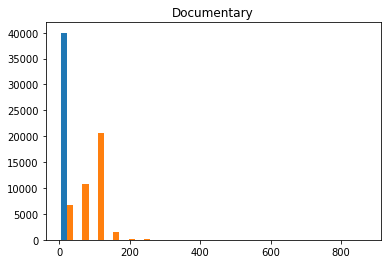

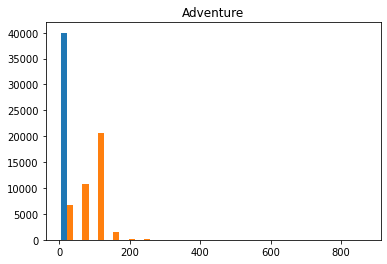

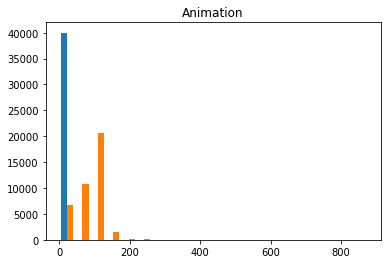

In [24]:
topGenres=df1[["Drama","Comedy","Short","Romance","Action","Crime","Thriller","Documentary","Adventure","Animation"]]
for genre in topGenres:
    plt.hist([topGenres[genre],df1["Runtime_mins"]],bins=20)
    plt.title(genre)
    plt.show()

Examine how the distribution of Runtime changes across genres for the top 10 most common genres.

Answer: It is no surprise that Drama & Comedy movies make up large proportion of the market. And all of the genres runtime median is close to 100 mins.

### Task 4: Eliminate mismatched rows

The dataframe was put together by merging two different sources of data and it is possible that the merging process was inaccurate in some cases (the merge was done based on movie title, but there are cases of different movies with the same title). The first source’s release time was represented by the column Year (numeric representation of the year) and the second by the column Released (string representation of release date).

Find and remove all rows where you suspect a merge error occurred based on a mismatch between these two variables. To make sure subsequent analysis and modeling work well, avoid removing more than 10% of the rows that have a Gross value present.

In [25]:
# Code for task 4
df1['Released']=pd.DatetimeIndex(df1['Released']).year
df2=df1[(df1['Year']-df1['Released'])<=1]
df2.shape

(35044, 59)

In [26]:
len(df1)-len(df2)

4956

Explanation: In order to find Released-Year mismatch, a simple condition was applied, whether the difference between Year & Released is not greater than 1 year. And hence 4956 rows were dropped.

### Task 5: Explore Gross revenue

For the commercial success of a movie, production houses want to maximize Gross revenue. Investigate if
Gross revenue is related to Budget, Runtime or Genre in any way.
Note: To get a meaningful relationship, you may have to partition the movies into subsets such as short vs. long duration, or by genre, etc.

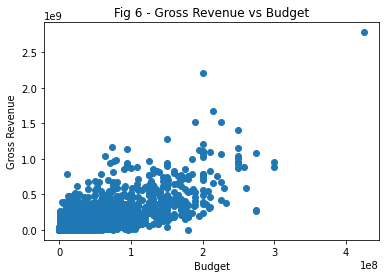

In [27]:
# Code
plt.scatter(df2['Budget'],df2['Gross'])
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.title('Fig 6 - Gross Revenue vs Budget')
plt.show()

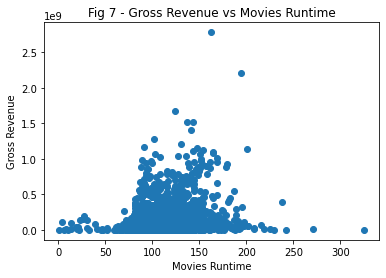

In [28]:
plt.scatter(df2['Runtime_mins'],df2['Gross'])
plt.xlabel('Movies Runtime')
plt.ylabel('Gross Revenue')
plt.title('Fig 7 - Gross Revenue vs Movies Runtime')
plt.show()

In [29]:
df2.Runtime_mins.median()

90.0

In [30]:
x=df2.Runtime_mins.median()
short_duration=[]
long_duration=[]
for i in df2['Runtime_mins']:
    if i<x:
        short_duration.append(i)
    else:
        long_duration.append(i)

df2['Short Duration Movie']=pd.DataFrame(short_duration)
df2['Long Duration Movie']=pd.DataFrame(long_duration)

C:\Users\Nikhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Nikhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


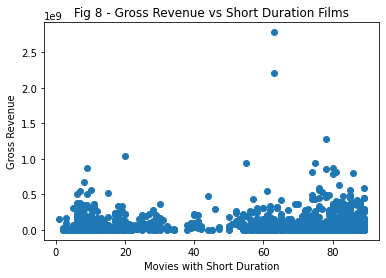

In [31]:
plt.scatter(df2['Short Duration Movie'],df2['Gross'])
plt.xlabel('Movies with Short Duration')
plt.ylabel('Gross Revenue')
plt.title('Fig 8 - Gross Revenue vs Short Duration Films')
plt.show()

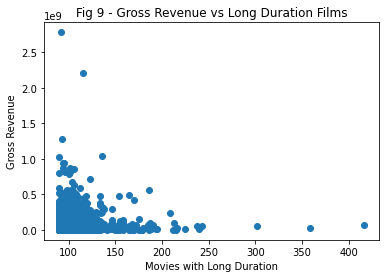

In [32]:
plt.scatter(df2['Long Duration Movie'],df2['Gross'])
plt.xlabel('Movies with Long Duration')
plt.ylabel('Gross Revenue')
plt.title('Fig 9 - Gross Revenue vs Long Duration Films')
plt.show()

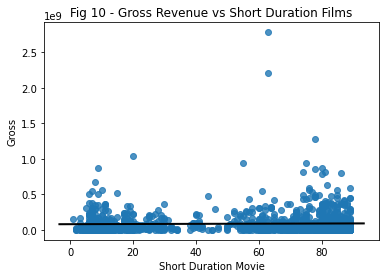

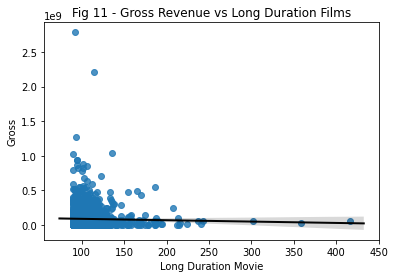

In [33]:
#Additional
sns.regplot(y=df2["Gross"], x=df2["Short Duration Movie"],line_kws={"color":"black","alpha":5,"lw":2})
plt.title("Fig 10 - Gross Revenue vs Short Duration Films")
plt.show()
sns.regplot(y=df2["Gross"], x=df2["Long Duration Movie"],line_kws={"color":"black","alpha":5,"lw":2})
plt.title("Fig 11 - Gross Revenue vs Long Duration Films")
plt.show()

Question: Did you find any observable relationships or combinations of Budget/Runtime/Genre that result in high Gross revenue? If you divided the movies into different subsets, you may get different answers for them - point out interesting ones.

Answer:
Fig 6 implies that Gross Revenue has an Increasing Linear Relationship with Budget(although not so clear). This means the higher the Budget, higher the Gross Revenue.

Fig 7 implies that Movies having Runtime highest & lowest have lower Gross Revenue. Movies having Runtime close to Median (which is 90 mins) have higher Gross Revenue. This means Gross Revenue with respect to Movies Runtime Distribution follows a Gaussian Distribution.

From fig 10, it seems that Gross Revenue has a Constant Linear Relationship with Movies having Short Duration.

From fig 11, it seems that Gross Revenue has a Decreasing Linear Relationship with Movies having Long duration.

### Task 6: Process Awards Column

The variable Awards describes nominations and awards in text format. Convert it to 2 numeric columns, the first capturing the number of wins, and the second capturing nominations. Replace the Awards column with these new columns, and then study the relationship of Gross revenue with respect to them.
Note that the format of the Awards column is not standard; you may have to use regular expressions to find the relevant values. Try your best to process them, and you may leave the ones that don’t have enough information as NAs or set them to 0s.

In [34]:
# code
def wins_extract(val):
    splitted=val.split()
    wins=0
    cur=""
    nex=""
    for i in range(0,len(splitted)):
        cur=splitted[i]
        if "Won" in cur:
            wins+=int(splitted[i+1])
        elif "win" in cur:
            wins+=int(splitted[i-1])
    return wins

In [35]:
df2=df2[df2['Awards'].notna()].copy()
df2['Wins'] = df2['Awards'].apply(lambda val : wins_extract(val) if val else None)

In [36]:
def nominations_extract(val):
    splitted=val.split()
    noms=0
    cur=""
    nex=""
    for i in range(0,len(splitted)):
        cur=splitted[i]
        if "nomination" in cur:
            noms+=int(splitted[i-1])
        elif "for" in cur:
            noms+=int(splitted[i+1])
    return noms

In [37]:
df2['Nominations'] = df2['Awards'].apply(lambda val: nominations_extract(val) if val else None)

In [38]:
df2.columns

Index(['Year', 'Released', 'Genre', 'Actors', 'Language', 'Country', 'Awards',
       'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'Type', 'tomatoMeter',
       'tomatoImage', 'tomatoRating', 'tomatoReviews', 'tomatoFresh',
       'tomatoRotten', 'tomatoConsensus', 'tomatoUserMeter',
       'tomatoUserRating', 'tomatoUserReviews', 'tomatoURL', 'BoxOffice',
       'Production', 'Budget', 'Domestic_Gross', 'Gross', 'Date',
       'Runtime_mins', 'Decade', 'Action', 'Adult', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi',
       'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western',
       'Short Duration Movie', 'Long Duration Movie', 'Wins', 'Nominations'],
      dtype='object')

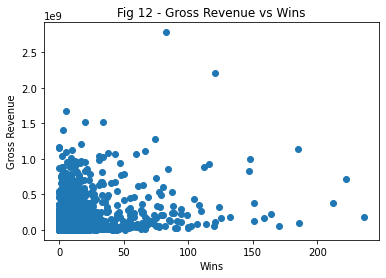

In [39]:
plt.scatter(df2['Wins'],df2['Gross'])
plt.xlabel('Wins')
plt.ylabel('Gross Revenue')
plt.title('Fig 12 - Gross Revenue vs Wins')
plt.show()

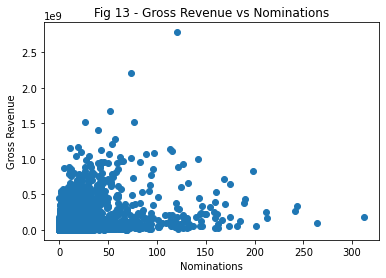

In [40]:
plt.scatter(df2['Nominations'],df2['Gross'])
plt.xlabel('Nominations')
plt.ylabel('Gross Revenue')
plt.title('Fig 13 - Gross Revenue vs Nominations')
plt.show()

Explanation: From both fig 12 & fig 13, it shows clearly that neither Wins nor Nominations have a correlation with Gross Revenue. This means higher the number of wins/nominations will not guarantee higher Gross Revenue.

In [41]:
print("Number of Rows with Valid Wins:",sum(df2.Wins!=0))
print("Number of Rows with Valid Nominations:",sum(df2.Nominations!=0))

Number of Rows with Valid Wins: 10251
Number of Rows with Valid Nominations: 10984


Question: How did you construct your conversion mechanism? How many rows had valid/non-zero wins or nominations?

Answer: The idea was to split Awards column into strings containing words: win, won, nomination, nominated, etc. Two functions were made, one each for extracting wins & extracting nominations, and then added new columns of Wins & Nominations to the data frame for further analysis. And as per above calculation, there were 10251 rows with valid wins & 10984 rows with valid nominations.

### Task 7: Movie ratings from IMDb and Rotten Tomatoes

There are several variables that describe ratings, including IMDb ratings (imdbRating represents average user ratings and imdbVotes represents the number of user ratings), and multiple Rotten Tomatoes ratings (represented by several variables pre-fixed by tomato). Read up on such ratings on the web (for example
rottentomatoes.com/about and www.imdb.com/help/show_leaf?votestopfaq). Investigate the pairwise relationships between these different descriptors using graphs.

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\plotting\_m

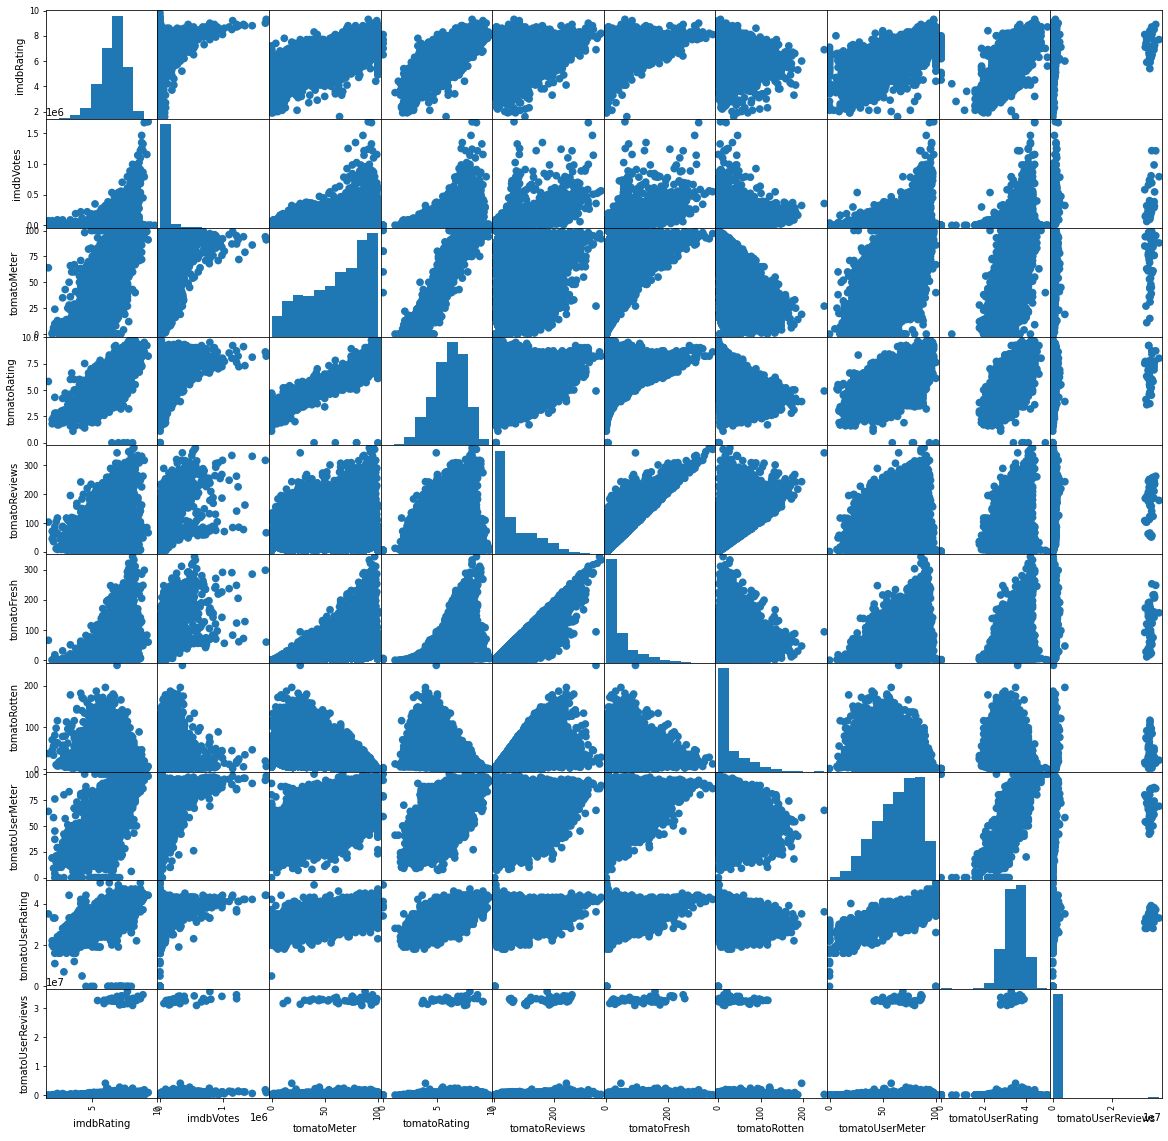

In [42]:
#Code
allRatings=df2[["imdbRating","imdbVotes","tomatoMeter","tomatoRating","tomatoReviews","tomatoFresh","tomatoRotten","tomatoUserMeter","tomatoUserRating","tomatoUserReviews"]]
gridPlot = pd.plotting.scatter_matrix(allRatings, figsize=(20,20), marker = 'o', hist_kwds = {'bins': 10}, s = 60, alpha = 1)
plt.show()

In [43]:
allRatings.corr()

,imdbRating,imdbVotes,tomatoMeter,tomatoRating,tomatoReviews,tomatoFresh,tomatoRotten,tomatoUserMeter,tomatoUserRating,tomatoUserReviews
imdbRating,1.000000,0.214397,0.747605,0.793638,0.095547,0.345569,-0.335262,0.800076,0.751009,0.045525
imdbVotes,0.214397,1.000000,0.141526,0.207555,0.581357,0.617405,0.232442,0.211028,0.170962,0.274165
tomatoMeter,0.747605,0.141526,1.000000,0.943340,-0.008472,0.338149,-0.534470,0.702237,0.661450,0.017348
tomatoRating,0.793638,0.207555,0.943340,1.000000,0.062100,0.387893,-0.467762,0.720729,0.693315,0.030111
tomatoReviews,0.095547,0.581357,-0.008472,0.062100,1.000000,0.878096,0.681226,0.041343,0.070968,0.157511
tomatoFresh,0.345569,0.617405,0.338149,0.387893,0.878096,1.000000,0.247896,0.288488,0.290288,0.155678
tomatoRotten,-0.335262,0.232442,-0.534470,-0.467762,0.681226,0.247896,1.000000,-0.357753,-0.300597,0.080720
tomatoUserMeter,0.800076,0.211028,0.702237,0.720729,0.041343,0.288488,-0.357753,1.000000,0.871457,0.013882
tomatoUserRating,0.751009,0.170962,0.661450,0.693315,0.070968,0.290288,-0.300597,0.871457,1.000000,-0.013681
tomatoUserReviews,0.045525,0.274165,0.017348,0.030111,0.157511,0.155678,0.080720,0.013882,-0.013681,1.000000


Question: Comment on the similarities and differences between the user ratings of IMDb and the critics ratings of Rotten Tomatoes.

Answer: As per above Correlation matrix, tomatoFresh & tomatoReviews have highest correlation of 87.8%. The correlation between IMDb rating & Rotten Tomatoes is negative, which is 33.5%.

### Task 8: Ratings and awards

These ratings typically reflect the general appeal of the movie to the public or gather opinions from a larger body of critics. Whereas awards are given by professional societies that may evaluate a movie on specific attributes, such as artistic performance, screenplay, sound design, etc.
Study the relationship between ratings and awards using graphs (awards here refers to wins and/or nomina- tions).

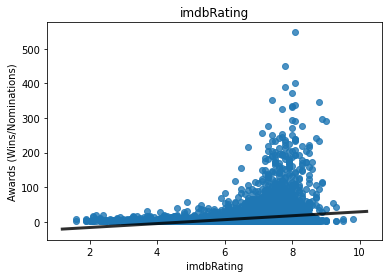

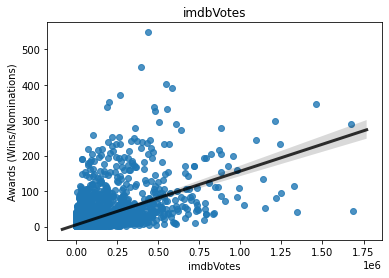

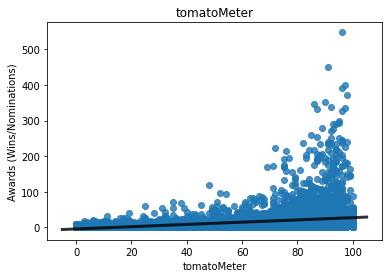

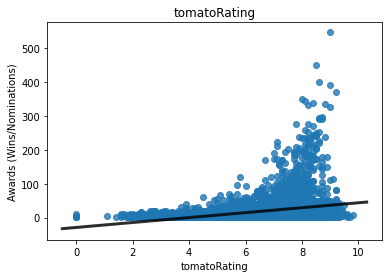

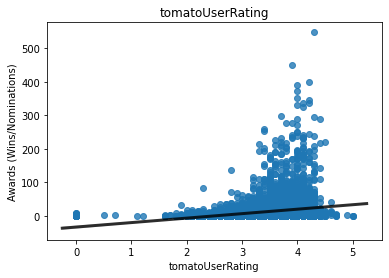

In [44]:
# Code
selectedRatings=df2[["imdbRating", "imdbVotes", "tomatoMeter", "tomatoRating","tomatoUserRating"]]
df2["Awards (Wins/Nominations)"] = df2.Wins + df2.Nominations
for i in selectedRatings:
    sns.regplot(y=df2["Awards (Wins/Nominations)"], x=selectedRatings[i],line_kws={"color":"black","alpha":0.8,"lw":3})
    plt.title(i)
    plt.show()

In [45]:
selectedRatings.corr()

,imdbRating,imdbVotes,tomatoMeter,tomatoRating,tomatoUserRating
imdbRating,1.000000,0.214397,0.747605,0.793638,0.751009
imdbVotes,0.214397,1.000000,0.141526,0.207555,0.170962
tomatoMeter,0.747605,0.141526,1.000000,0.943340,0.661450
tomatoRating,0.793638,0.207555,0.943340,1.000000,0.693315
tomatoUserRating,0.751009,0.170962,0.661450,0.693315,1.000000


Q: How good are these ratings in terms of predicting the success of a movie in winning awards or nominations? Is there a high correlation between two variables?

Answer: From the above graphs, it is quite evident that all the Selected Ratings have a positive correlation with Awards. Notably IMDb Votes have highest correlation with Awards.

### Task 9. Expected insights
Come up with two new insights (backed up by data and graphs) that is expected. Here “new” means insights that are not an immediate consequence of one of the above tasks. You may use any of the columns already explored above or a different one in the dataset, such as Title, Actors, etc.

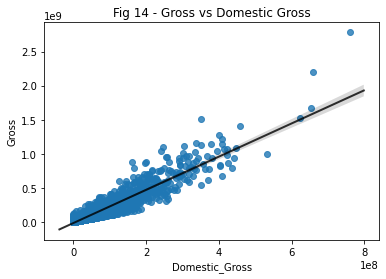

In [46]:
# code
sns.regplot(y=df2["Gross"], x=df2["Domestic_Gross"],line_kws={"color":"black","alpha":0.8,"lw":2})
plt.title("Fig 14 - Gross vs Domestic Gross")
plt.show()

In [47]:
print("Percentage of movies in English is:",len(df2[df2.Language=="English"])/len(df2)*100)
print("Percentage of movies made in USA is:",len(df2[df2.Country=="USA"])/len(df2)*100)

Percentage of movies in English is: 54.82171214089794
Percentage of movies made in USA is: 46.2104807275877


Answer: 1)From fig 14, we can see that Domestic Gross & Gross have a positive Linear correlation, which is totally expected.

2)From above calculation, we see that English make up more than half (54.82%) of the movies list. Apart from that, it is seen that 46.21% of English movies are made in USA, which is also expected, as USA is "Home of Hollywood".

### Task 10. Unexpected insight
Come up with one new insight (backed up by data and graphs) that is unexpected at first glance and do your best to motivate it. Same instructions apply as the previous task.

In [48]:
# Code
df3_earn=df2[df2['Gross'].notna()].copy()
df3_earn=df3_earn[df3_earn['Domestic_Gross'].notna()].copy()
df3_earn=df3_earn[df3_earn['Budget'].notna()].copy()
df3_earn['Balance']=df3_earn.Budget - df3_earn.Gross - df3_earn.Domestic_Gross

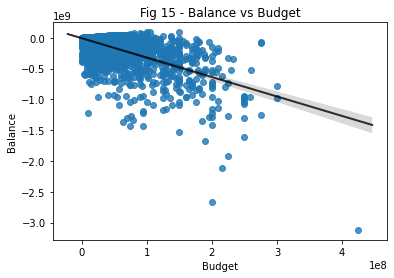

In [49]:
sns.regplot(y=df3_earn["Balance"], x=df3_earn["Budget"],line_kws={"color":"black","alpha":0.8,"lw":2})
plt.title("Fig 15 - Balance vs Budget")
plt.show()

In [50]:
print("Percentage of movies which are making profits is:",len(df3_earn[df3_earn.Balance>0])/len(df3_earn)*100)

Percentage of movies which are making profits is: 20.41898700609918


Answer: Fig 15 shows that most of the movies are facing losses since Balance & Budget have a negative Linear correlation, which is totally unexpected.
Also from above calculation, we see that only 20.41% of movies are making profits, which is a shocker.